# Coursework

In [306]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import numpy as np
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

## Utilities code

We have provided you a utilities file which contains two functions: load points from file
and view data points. The first will load the data points from a file and return them as two numpy arrays. The second will visualise the data points
with a different colour per segment.

degrees 1 y [9.71367432 1.65467376]
degrees 1 error 4.425509678289876e-28
degrees 2 y [9.71367432e+00 1.65467376e+00 2.77555756e-16]
degrees 2 error 3.54261655316652e-26
Min error 3.54261655316652e-26
New best degree 2
degrees 3 y [ 9.71367432e+00  1.65467376e+00 -1.47659662e-14  3.78169718e-16]
degrees 3 error 1.0463955917830842e-24
degrees 4 y [ 9.71367432e+00  1.65467376e+00 -2.84078316e-14  6.13398221e-15
 -4.25007252e-16]
degrees 4 error 1.2451201614355146e-22
EPRCENT DIFFERENCE 0.37822618488972315
Min error 4.425509678289876e-28
degrees 1 y [54.66153956 -1.92745202]
degrees 1 error 6.024530733172867e-27
degrees 2 y [ 5.46615396e+01 -1.92745202e+00 -3.92741395e-15]
degrees 2 error 1.8273103134317564e-24
Min error 1.8273103134317564e-24
New best degree 2
degrees 3 y [ 5.46615396e+01 -1.92745202e+00 -1.62231339e-13  1.53523028e-15]
degrees 3 error 2.7835455205398972e-21
degrees 4 y [ 5.46615396e+01 -1.92745202e+00 -9.79489823e-11  2.67746242e-12
 -2.72380859e-14]
degrees 4 error 4.5

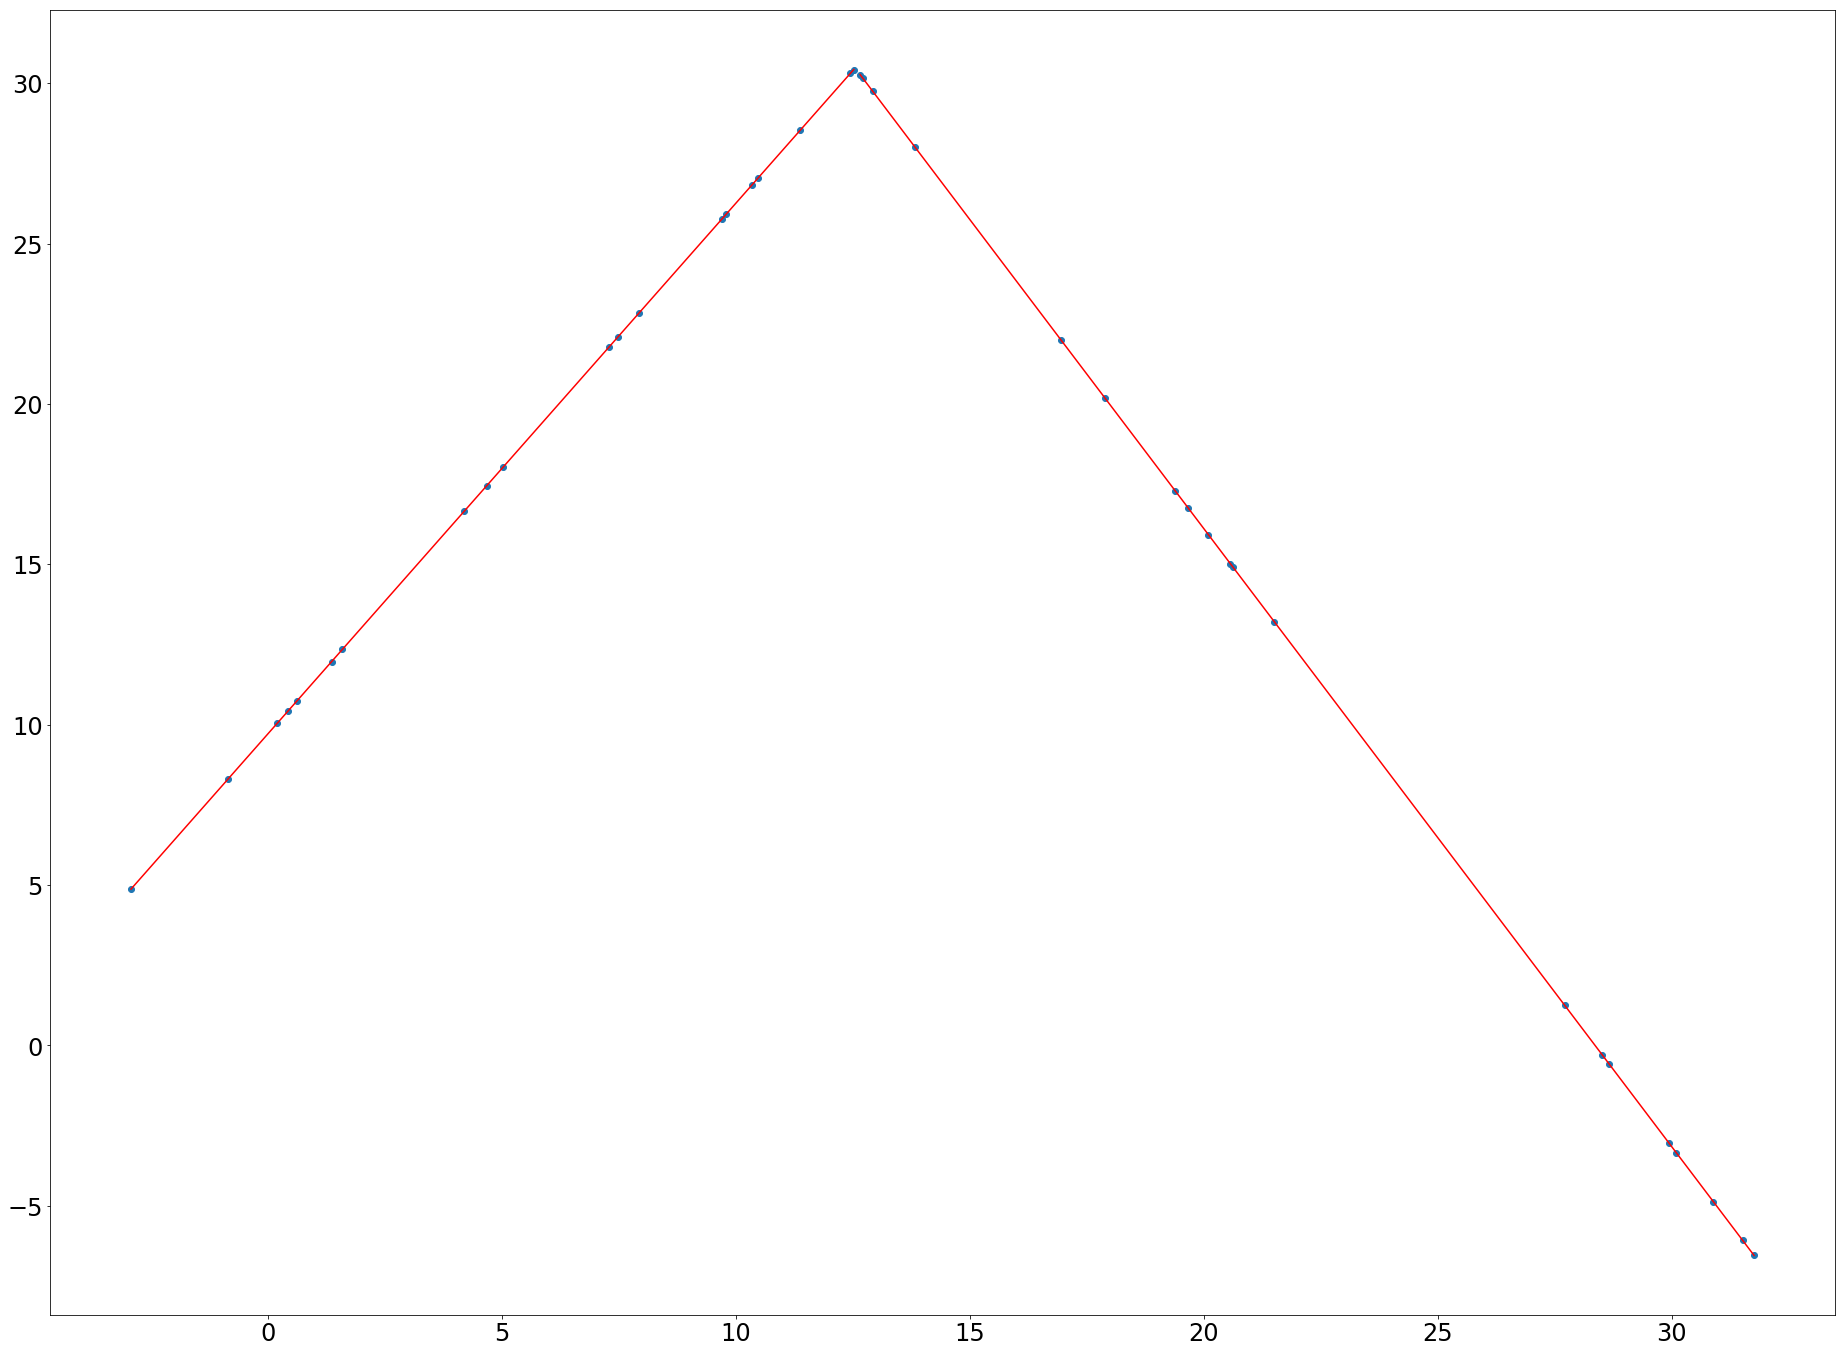

In [310]:
#import utilities

#import importlib

importlib.import_module('utilities')

#filename = sys.argv[1]

#plot_no_plot = ""
#if(len(sys.argv) > 2):
#    plot_no_plot  = sys.argv[2]

#x, y = load_file("train/" + str(filename))

def least_squares(x, y):
    ones = np.ones(x.shape)
    newx = np.column_stack((ones, x))
    a = np.linalg.inv(newx.T.dot(newx)).dot(newx.T).dot(y)
    return(a)

def poly_least_squares(x, y, degree):
    ones = np.ones(x.shape)
    newx = np.column_stack((ones, x))
    for i in range(2, degree + 1):
        newx = np.column_stack((newx, x**i))
    a = np.linalg.inv(newx.T.dot(newx)).dot(newx.T).dot(y)
    return(a)

def sumSquaredError(y, yLine):
    yTemp = yLine - y
    yTemp = np.square(yTemp)
    sumSquaredErrorValue = sum(yTemp)
    return(sumSquaredErrorValue)

def calculateY(ab, degree, testPointsX):  
    for degrees in range(1, degree + 1):
        if degrees == 1:
            z = ab[0] + ab[degrees] * testPointsX**degrees
        else:
            z = ab[degrees] * testPointsX**degrees + z
    
    return(z)
    
testPoints = load_points_from_file('.\\train\\basic_2.csv')
# print(testPoints)

numberOfSegments = int(len(testPoints[0]) / 20)
# print(numberOfSegments)
plt.scatter(testPoints[0], testPoints[1])

degree = 4
bestDegree = 0
errorCounter = 0

for outer in range(numberOfSegments):
    minError = 100000000

    testPointsX = testPoints[0][outer * 20:outer * 20 + 20]
    testPointsY = testPoints[1][outer * 20:outer * 20 + 20]
        
    ab = poly_least_squares(testPointsX, testPointsY, 1)
    print('degrees', 1, 'y', ab)
    z = calculateY(ab, 1, testPointsX)
    linearError = sumSquaredError(testPointsY, z)
    print('degrees', 1, 'error', linearError)
    
    for degrees in range(2, degree + 1):
        
        ab = poly_least_squares(testPointsX, testPointsY, degrees)
        print('degrees', degrees, 'y', ab)
            
        z = calculateY(ab, degrees, testPointsX)
            
        error = sumSquaredError(testPointsY, z)
        print('degrees', degrees, 'error', error)
                
        if(error < minError):
            bestDegree = degrees
            minError = error
            print('Min error', minError)
            print('New best degree', bestDegree)
     
    if(linearError < minError):
        minError = linearError
        bestDegree = 1
    else:
        percentageDifference = abs((minError - linearError) / linearError)
    
        if(percentageDifference < 0.4):
            minError = linearError
            bestDegree = 1
    
    print('EPRCENT DIFFERENCE', percentageDifference)
    
    ab = poly_least_squares(testPointsX, testPointsY, bestDegree)
    
    z = calculateY(ab, bestDegree, testPointsX)
    
    print('Min error', minError)
    
    plt.plot(testPointsX, z, 'red')
    
    errorCounter = minError + errorCounter
    #error = sumSquaredError(testPointsY, z)
    #tempError = error + tempError


#print(tempError)
print('Total Error:', errorCounter)
plt.show()

In [262]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def load_points_from_file(filename):
    """Loads 2d points from a csv called filename
    Args:
        filename : Path to .csv file
    Returns:
        (xs, ys) where xs and ys are a numpy array of the co-ordinates.
    """
    points = pd.read_csv(filename, header=None)
    return points[0].values, points[1].values


def view_data_segments(xs, ys):
    """Visualises the input file with each segment plotted in a different colour.
    Args:
        xs : List/array-like of x co-ordinates.
        ys : List/array-like of y co-ordinates.
    Returns:
        None
    """
    assert len(xs) == len(ys)
    assert len(xs) % 20 == 0
    len_data = len(xs)
    num_segments = len_data // 20
    colour = np.concatenate([[i] * 20 for i in range(num_segments)])
    plt.set_cmap('Dark2')
    plt.scatter(xs, ys, c=colour)
    plt.show()

Generate a scatter plot of $y_i$ versus $x_i$.

## 2. Create a general function

Change the above code to a function that receives the parameters $a$, $b$ and $n$ for the equation $y_i = a + b x_i + e_i$ and returns $n$ samples as shown in the previous exercise.  

Use the code to generate 100 samples from the equation above and visualise them.

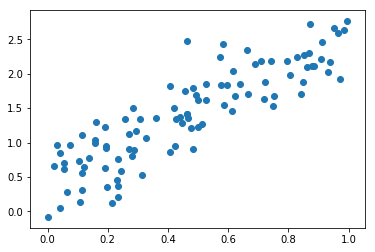

In [31]:
# write your code here

def function(a, b, n):
    x = np.random.uniform(0, 1, n)
    e = np.random.normal(0, np.sqrt(0.1), n)

    y = b * x + e + a
    
    return x, y
    
x1, y1 = function(0.5, 2, 100)

plt.scatter(x1, y1)
plt.show()

## 3. Least squares ##
Using the sequences ${y_i}$ and ${x_i}$ from **2**, implement the matrix form of the least squares method to determine estimates of the parameters $a$ and $b$ (which we denote as $a'$ and $b'$) assuming that $y_i=a+bx_i$.

**Hints**
* The formula for the matrix form of least squares is given by: $A=(X.X^T)^{-1}.X^T.Y$ where $A=[a',b']$.
* It is important that you keep track of the dimensions of your matrices, especially $X$. Remember that $X^T \cdot X$ should give a 2x2 matrix.
* Because of the equation being in the form of $y_i=a+bx_i$ the first column of X should be all 1s.
* You don't need to use your code for matrix inverse and can instead use the function `np.linalg.inv`.

In [51]:
# write your code here
def least_squares(x, y):
    ones = np.ones(x.shape)
    newx = np.column_stack((ones, x))
    a = np.linalg.inv(newx.T.dot(newx)).dot(newx.T).dot(y)
    return(a)

least_squares(x1, y1)


array([0.42746508, 2.10533493])

### Why aren't the values of a and b the same as in the original equation?

### Answer: 

Write your answer here.

## 4. Line fitting and plotting

Draw the line defined by the estimated values of $a'$ and $b'$ on top of the scatter plot generated in point **2**.

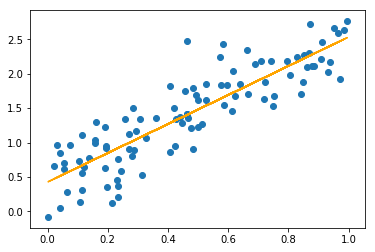

In [59]:
# write your code here
ab = least_squares(x1, y1)

z = ab[0] + ab[1] * x1

plt.scatter(x1, y1)
plt.plot(x1, z, 'orange')
plt.show()


## 5. Outliers

Add a few outliers to your data. For example, add the points $\{(0.5, 5), (0.6, 5), (0.7, 5)\}$ to the sampled sequences from **2**.

Re-estimate the best line that fits the data after the addition of the outliers.

Plot the best fit line before and after the outlier data, in a way similar to the figure below (including the colouring and the legend).


### Hint
* Both `plot` and `scatter` have an optional parameter label which allows you to label each series for the legend.
* Both `plot` and `scatter` have an optional parameter c which can be passed a colour, e.g. `c='r'` will set the colour to red.
* `ax.legend` will create a legend automatically as long as your series have been labelled.

![Line fit](lineFit.jpg)

In [25]:
# write your code here



## 6. Calculating the error

We can now calculate the error in the predicted line using sum squared error (which is what least squares regression is minimising).

Calculate the error of the best fit line and the best fit line with outliers.

**Hint**
* The sum squared error formula is $\sum_i (\hat{y}_i - y_i)^2$ where $\hat{y}_i = a + bx_i$.

In [26]:
# write your code here


## 7. Moving to a non-linear system

So far we have been using the least squares method only to find the line of best fit for linear equations, however it can be extended quite easily to certain non-linear lines.

Adapting this method lies in the creation of the $X$ matrix. The matrix we construct has two columns, the first a column of ones and the second a column of x values. Note how each column represents a function applied to x: $x^0$, $x^1$.

If we were instead given the function $y = a + be^x$ to apply the least squares method we can just modify how we define $X$: instead of the second column including $x^1$ we can insert $e^x$.

Given the set of points below, calculate $a$ and $b$ assuming they fit an exponential curve.
### Hint
* `np.exp(new_x)` will define the new column to add.

In [27]:
new_x = np.array([-5, -4, -2, -1.5, -0.5, 0.5, 0.75, 1, 1.3, 1.9, 2.1, 2.4, 2.8, 3, 3.2])
new_y = np.array([0.407, 0.42, 0.549, 0.645, 1.07, 2.21, 2.73, 3.39, 4.44, 7.75, 9.38, 12.5, 18.5, 22.5, 27.4])

# write your code here



### Visualising the result
We can now visualise the fitted line as a figure as before using `plot`. Due to the non-linear nature of the equation we can use `np.linspace(-5, 3.2, 100)` which returns 100 evenly spaced numbers in the interval between -5 and 3.2. 

Create a graph plotting both the original points and the fitted line as below:
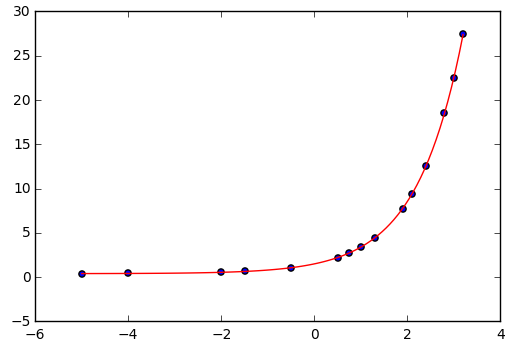

In [28]:
# write your code here



### What other types of functions can we extend this to?

For example why can't we fit to the function $y=a \cdot e^{bx}$?

### Answer

Write your answer here.